# LGMVIP- DataScience

# Task 2  -  Stock Market Prediction

# Author : Mansur Shaik 

## Importing the Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Loading the dataset

In [9]:
d_frm=pd.read_csv('C:/Users/mansurshaik/Downloads/raw_data_stock_market_prediction.csv.csv')
d_frm.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## Info of data_frame

In [10]:
d_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


## Preprocessing the data

In [11]:
# Checking for null values
d_frm.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
#copying the column to another data_frame
df1=d_frm.reset_index()['Close']
#showing stats of data_frame
d_frm.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Data Visualization

Text(0.5, 1.0, 'Closing price')

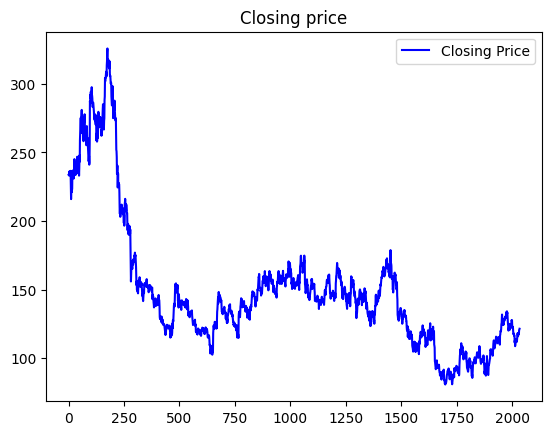

In [13]:
# ploting the graph of closing column
plt.plot(df1,color='b',label="Closing Price")
plt.legend(loc="upper right")
plt.title("Closing price")

Text(0.5, 1.0, 'Opening Price')

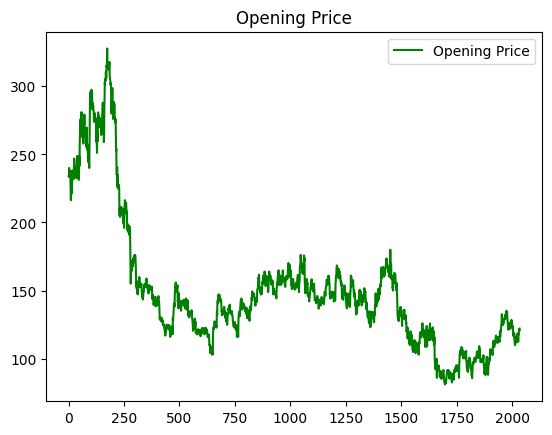

In [14]:
#plotting the graph of OpeningColumn
plt.plot(d_frm['Open'],color='g',label="Opening Price")
plt.legend(loc="upper right")
plt.title("Opening Price")

<Axes: >

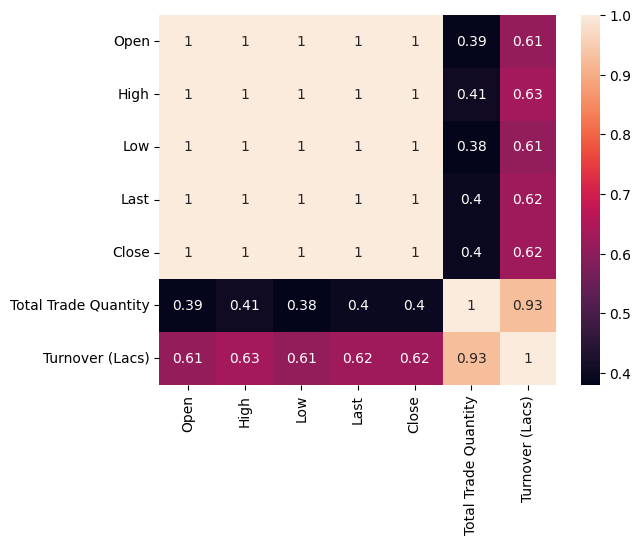

In [15]:
#Correlation matrix of data_frame
sns.heatmap(d_frm.corr(numeric_only=True),annot=True)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Total Trade Quantity'}>],
       [<Axes: title={'center': 'Turnover (Lacs)'}>, <Axes: >, <Axes: >]],
      dtype=object)

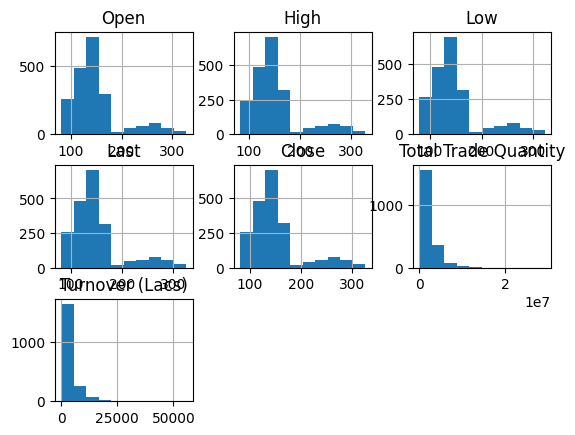

In [16]:
#Plotting the all Columns in the data_frame using histograms
d_frm.hist()

In [17]:
#Scaling 
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [18]:
#Spillting the train data and test data
train_size=int(len(df1)*0.6)
test_size=len(df1)-train_size
train_data=df1[:train_size,:]
test_data=df1[train_size:len(df1),:1]
print(train_size,test_size)
print(train_data,test_data)

1221 814
[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.34517974]
 [0.31781046]
 [0.33047386]] [[0.32128268]
 [0.34007353]
 [0.3310866 ]
 [0.31495098]
 [0.32066993]
 [0.32312092]
 [0.32352941]
 [0.30473856]
 [0.3057598 ]
 [0.30739379]
 [0.2943219 ]
 [0.30330882]
 [0.28125   ]
 [0.25694444]
 [0.26654412]
 [0.26552288]
 [0.26531863]
 [0.25408497]
 [0.26123366]
 [0.27798203]
 [0.28431373]
 [0.27246732]
 [0.27410131]
 [0.28227124]
 [0.29084967]
 [0.28513072]
 [0.28492647]
 [0.26838235]
 [0.26981209]
 [0.27062908]
 [0.25694444]
 [0.24754902]
 [0.2567402 ]
 [0.23713235]
 [0.23284314]
 [0.2250817 ]
 [0.24652778]
 [0.25776144]
 [0.26879085]
 [0.26674837]
 [0.24897876]
 [0.24489379]
 [0.24795752]
 [0.24305556]
 [0.27246732]
 [0.26797386]
 [0.26368464]
 [0.26776961]
 [0.24897876]
 [0.23284314]
 [0.25265523]
 [0.26736111]
 [0.27001634]
 [0.32169118]
 [0.31821895]
 [0.32046569]
 [0.30943627]
 [0.28921569]
 [0.29656863]
 [0.30147059]
 [0.30085784]
 [0.30535131]
 [0.30228758]
 [0.31086601]
 [0.2

In [19]:

def cr_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1): 
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [20]:
time_step=100
x_train,y_train=cr_dataset(train_data,time_step)
x_test,y_test=cr_dataset(test_data,time_step)

In [21]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1120, 100) (1120,) (713, 100) (713,)


In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [23]:
#creating Stacked LSTM Model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 19s 463ms/step - loss: 0.0304 - val_loss: 0.0018
Epoch 2/100
18/18 [==============================] - 6s 361ms/step - loss: 0.0042 - val_loss: 9.8153e-04
Epoch 3/100
18/18 [==============================] - 6s 353ms/step - loss: 0.0018 - val_loss: 8.2150e-04
Epoch 4/100
18/18 [==============================] - 6s 359ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/100
18/18 [==============================] - 6s 360ms/step - loss: 0.0015 - val_loss: 8.8626e-04
Epoch 6/100
18/18 [==============================] - 6s 354ms/step - loss: 0.0015 - val_loss: 9.0529e-04
Epoch 7/100
18/18 [==============================] - 6s 354ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
18/18 [==============================] - 6s 358ms/step - loss: 0.0014 - val_loss: 9.5795e-04
Epoch 9/100
18/18 [==============================] - 6s 345ms/step - loss: 0.0013 - val_loss: 9.0362e-04
Epoch 10/100
18/18 [==============================] - 6s 354ms/ste

In [26]:
 ##Predict and check performance matrix
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

23/23 [==============================] - 3s 68ms/step


In [27]:
##transformback to original form
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [28]:
##Calculate RootMeanSquaredError Performance Metics
## train data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.14432249234807

In [29]:
## test data
math.sqrt(mean_squared_error(y_test,test_predict))

119.69223381141579

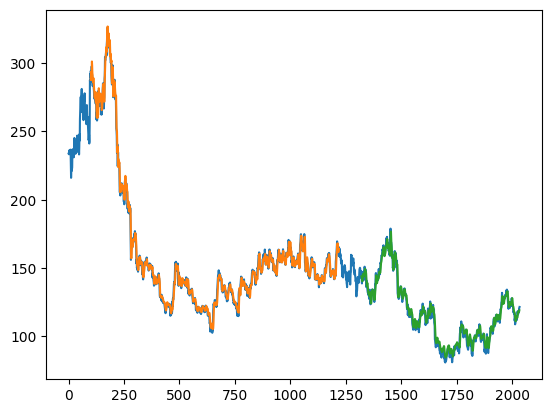

In [30]:
##plotting
#shift train predictions 
time_step=100
plot_train_predicted=np.empty_like(df1)
plot_train_predicted[:, :]=np.nan
plot_train_predicted[time_step:len(train_predict)+time_step, :]=train_predict
#shift test predictions 
plot_test_predicted=np.empty_like(df1)
plot_test_predicted[:, :]=np.nan
plot_test_predicted[len(train_predict)+(time_step*2)+1:len(df1)-1,:]=test_predict
#baseline and prediction
plt.plot(scale.inverse_transform(df1))
plt.plot(plot_train_predicted)
plt.plot(plot_test_predicted)
plt.show()

In [31]:
# Analyzing the Closing Price from the Dataframe# Analyzing the Closing Price from the Dataframe

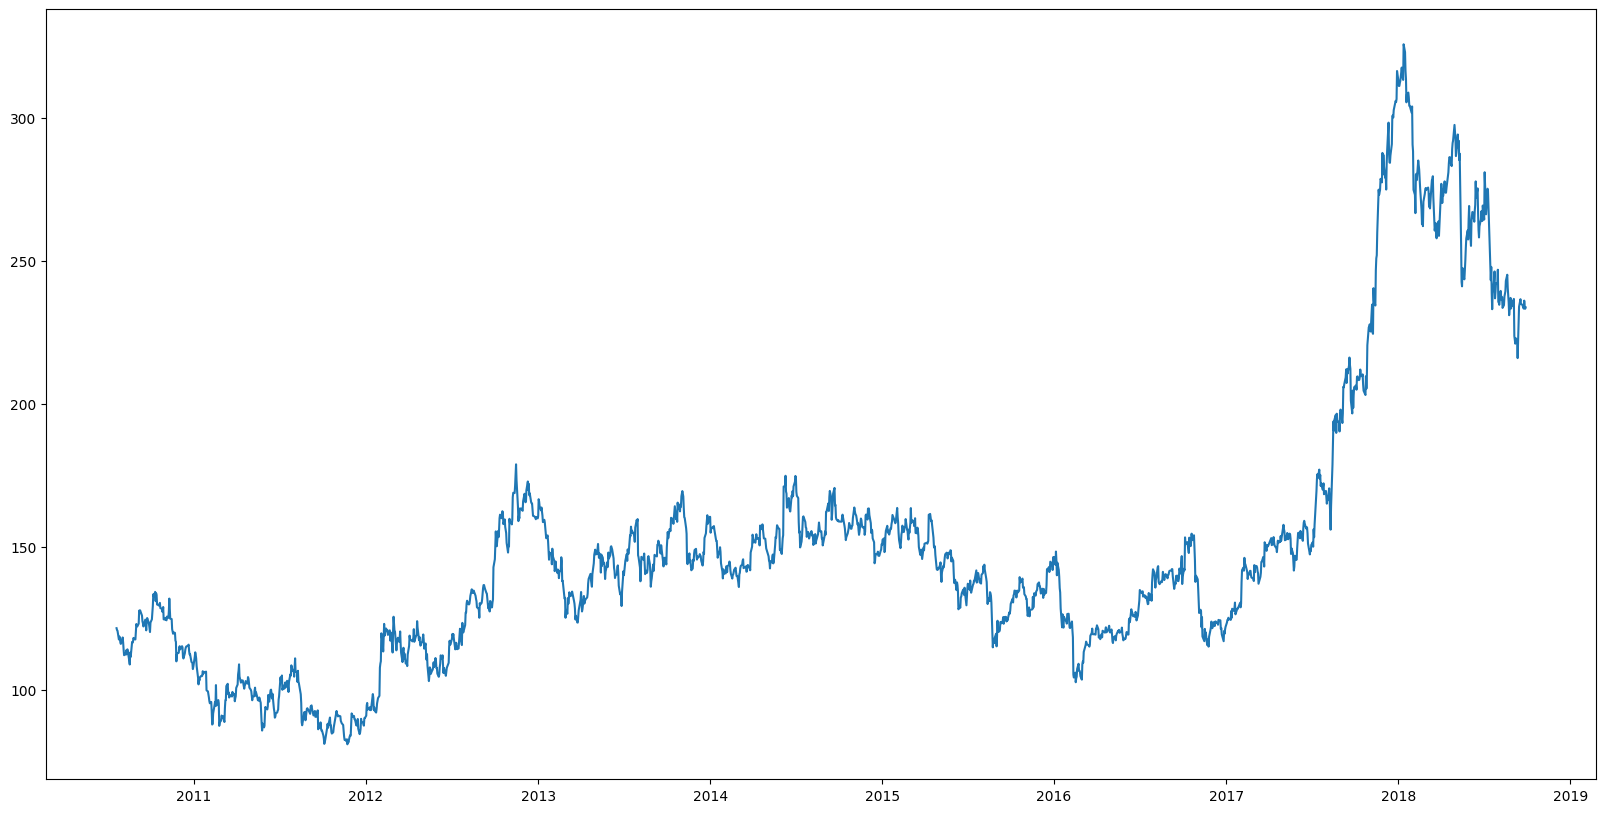

In [37]:
d_frm["Date"] = pd.to_datetime(d_frm.Date)
d_frm.index = d_frm['Date']

plt.figure(figsize=(20, 10))
plt.plot( d_frm["Close"], label='ClosePriceHist')